# Introduction
PCA is useful for reducing dimensionality. Some learning algorithms do not handle high dimensionality data very well.

In this exercise, we will experiment with reducing dimensionality even though both data sets we are using work fine without PCA. 

PCA is also useful for removing colinearity. When we have data that is colinear, a traditional solver for linear or logistic regression will have problems with it. This is due to the fact that the matrix algebra will have a non-unique solution. Modern regression libraries can handle much of this for us and still find a solution.  

In the examples in this exercise, we will start with the Iris dataset and use PCA for visualization. Next, we will take another data set and reduce the dimensionality, then show that the accuracy was not substantially impacted by the reduced number of dimensions.

The data set I selected for the second part looks like it already has some transformations and normalizations applied to it so you will not notice a massive reduction in the number of features.

**Student name**: Maxine Mayor

**Pair programming partner**:

# Step 0
Make a copy of the notebook in your Google Drive

# A few imports


In [66]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Problem 1 (10 points)
* Load the Iris dataset
* Use PCA to reduce the dimensionality to 2 components
* Create a scatter plot using the 2 components
  * Color the points based on the label

In [67]:
#Load iris dataset
iris = datasets.load_iris()

In [68]:
target_names = {0:'setosa', 1:'versicolor', 2:'virginica'}
 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
 
df['target'] = iris.target
df['target_names'] = df['target'].map(target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [69]:
#Load features and targets separately
X = iris.data
y = iris.target

In [70]:
#Data scaling
x_scaled = StandardScaler().fit_transform(X)

In [71]:
#Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
#Fit and transform data
pca_features = pca.fit_transform(x_scaled)
 
# reate dataframe
pca_df = pd.DataFrame(data = pca_features, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


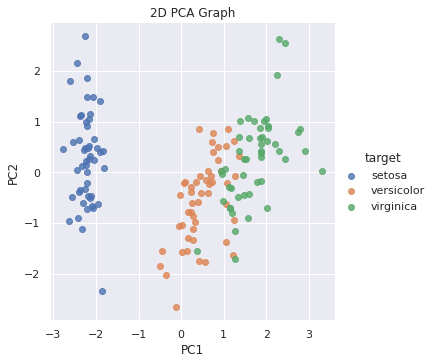

In [72]:
#Scatter plot using the 2 components
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

# Problem 2 (20 points)
* Use the credit card fraud data that is stored on the shared Google drive
* There are 29 features and 2 classes in the data.
* Remove the index column. It is not a feature


## Read the data

In [73]:
import pandas as pd

from google.colab import drive
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score

In [74]:
#Mount Google Drive
drive.mount('/content/drive')
#Change this path to where you move the file
#https://drive.google.com/drive/folders/15Y6nCX_0LrXQNe4NTWiEV2ev4Rv3feEf
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv
path = "/content/drive/MyDrive/CS450_Share/CSV Files/creditcard.csv"
#Change the path to where you copy the file
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
display(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
class       int64
dtype: object

## Create a model using multiple logistic regression
* Use an 80/20 test/train split

In [77]:
#Scale data
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#Drop unscaled time and amount columns
df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

#Add scaled time and amount columns
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

print(df)

        scaled_amount  scaled_time         V1         V2        V3        V4  \
0            1.783274    -0.994983  -1.359807  -0.072781  2.536347  1.378155   
1           -0.269825    -0.994983   1.191857   0.266151  0.166480  0.448154   
2            4.983721    -0.994972  -1.358354  -1.340163  1.773209  0.379780   
3            1.418291    -0.994972  -0.966272  -0.185226  1.792993 -0.863291   
4            0.670579    -0.994960  -1.158233   0.877737  1.548718  0.403034   
...               ...          ...        ...        ...       ...       ...   
284802      -0.296653     1.034951 -11.881118  10.071785 -9.834783 -2.066656   
284803       0.038986     1.034963  -0.732789  -0.055080  2.035030 -0.738589   
284804       0.641096     1.034975   1.919565  -0.301254 -3.249640 -0.557828   
284805      -0.167680     1.034975  -0.240440   0.530483  0.702510  0.689799   
284806       2.724796     1.035022  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7   

In [78]:
#Split dataset in features and target variable
feature_cols = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount']
X = df[feature_cols] #Features
y = df['class'] #Target variable

In [79]:
#Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=16) #80% training, 20% test

In [80]:
#Instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter = 1000)

#Fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

## Test the model
* Show the confusion matrix using test data
* Evaluate the F1 score of the model

In [81]:
#Confusion matrix using test data
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[227395,     46],
       [   172,    233]])

In [82]:
#F1 score
print('F1 is: ', f1_score(y_test, y_pred))

F1 is:  0.6812865497076023


## Transform the data using PCA
* Reduce the feature set to the number of components that explain 90% of the variance

In [83]:
import pandas as pd

from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [84]:
#Mount Google Drive
drive.mount('/content/drive')
# Change this path to where you move the file
# https://drive.google.com/drive/folders/15Y6nCX_0LrXQNe4NTWiEV2ev4Rv3feEf
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv
path = "/content/drive/MyDrive/CS450_Share/CSV Files/creditcard.csv"
#Change the path to where you copy the file
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#Split dataset in features and target variable
feature_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X = df[feature_cols] #Features
y = df['class'] #Target variable

#Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [86]:
#Transform features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Merge with df
pca_df = pd.DataFrame(X_pca,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 
                                     'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.944368,-0.476748,-0.402899,-0.663194,-0.513915,0.541208,0.804811,-0.645596,0.275813,-0.020838
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.250510,0.285343,-0.343899,0.041702,0.240177,-0.022490,-0.460404,0.781139,0.764582,0.014904
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.672413,0.143382,0.187786,-0.715355,-1.237224,-0.544368,-0.020568,-0.747321,0.213588,0.135266
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.199996,0.050863,-0.845263,-0.968362,-0.885875,-1.962576,0.172773,0.650483,1.028256,0.050116
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.620391,-0.746336,-0.365941,-0.953421,0.052940,0.054427,0.505773,0.917070,1.336490,0.042204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,4.103032,-6.576394,3.840145,1.932578,-7.259039,-1.420659,-3.043061,1.412623,-0.358078,-0.928435
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.114758,-0.654573,0.568696,0.436421,-0.127054,-1.082636,0.340490,-0.011453,-1.465144,0.027509
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-1.016524,-0.053842,-0.547677,2.190185,-0.780762,-0.016340,-0.353602,-0.906717,-0.245032,-0.003921
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-1.234917,-0.626282,-0.874717,-1.298958,-0.545639,0.527524,0.994500,-0.318999,-1.078329,0.024255


In [87]:
#Calculate how many principal components to use for 90% variance
precent_of_variance_explained = .9 #90%

pca = PCA(n_components=precent_of_variance_explained)

pca_data = pca.fit_transform(X_scaled)

print("{} Principal Components are required to explain {} of the variation in this data.".format(pca.n_components_,precent_of_variance_explained))

26 Principal Components are required to explain 0.9 of the variation in this data.


### Show how much each original feature conributed to the remaining components


In [88]:
#Calculate loadings
#Loadings show the relationship between the PCs and the original variables
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 
                                     'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26'], index = feature_cols)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
Time,-0.029647,0.706467,4.514609e-12,-4.271326e-12,9.318080e-13,-4.354176e-12,2.005600e-12,6.979137e-13,-3.909062e-12,2.618981e-13,...,1.924926e-14,-1.254683e-13,-1.518098e-13,3.729214e-12,2.401099e-12,4.809014e-14,-6.837212e-13,-5.309419e-12,7.347628e-12,5.972902e-12
V1,-0.171552,0.112951,1.409584e-01,-1.038966e-01,3.165803e-01,-1.085314e-01,-1.503051e-01,-2.450257e-01,5.679842e-02,3.483383e-01,...,2.060062e-02,-1.075068e-02,-1.914905e-02,-2.458446e-01,-2.429295e-01,1.279742e-01,-4.135364e-01,-4.040424e-02,3.259844e-01,4.155945e-02
V2,-0.391550,-0.030445,-1.572393e-01,-1.626557e-01,1.707664e-01,-3.061852e-01,-2.838430e-01,6.465084e-02,-8.786130e-02,2.083879e-02,...,3.220866e-02,1.167028e-02,1.363684e-01,1.789673e-02,2.119612e-01,2.682063e-02,9.164184e-02,-1.155628e-01,-4.032093e-01,2.218365e-01
V3,-0.142528,-0.441333,-2.488148e-01,1.266491e-01,-1.157410e-01,4.619412e-02,-1.057894e-01,-8.086621e-02,-8.242258e-02,5.984835e-03,...,1.661545e-02,-3.208015e-02,-4.571589e-03,2.218822e-01,-1.453441e-01,-1.968473e-01,-1.105104e-01,-3.286820e-01,2.856920e-01,-5.644691e-02
V4,0.076064,-0.105144,5.747462e-02,-1.379087e-01,-1.086857e-02,9.384915e-02,1.208262e-01,-1.467827e-01,4.291092e-02,3.178818e-01,...,8.128905e-02,-2.362839e-01,-2.865801e-01,-3.994841e-01,1.572812e-01,-1.069233e-01,-5.708037e-02,-2.790604e-01,-6.055505e-02,4.499191e-03
V5,-0.290266,0.164660,-2.757383e-01,-1.462611e-01,-2.900812e-01,2.240004e-01,8.046510e-02,8.671774e-02,3.879699e-01,8.499541e-02,...,-4.744307e-02,-1.381151e-01,-1.952702e-02,-7.841796e-02,-2.055353e-01,1.114936e-01,5.926528e-02,9.967455e-02,-5.328223e-02,-2.674469e-01
V6,0.161221,-0.057190,7.531864e-02,1.500674e-01,7.706637e-02,-2.323550e-01,4.365883e-02,9.841217e-02,1.855264e-01,1.983169e-01,...,3.149559e-01,2.344789e-01,1.839574e-01,2.302790e-01,-3.070758e-01,-4.225424e-02,-1.212910e-01,1.216362e-01,-2.078037e-02,1.884292e-02
V7,0.290369,0.102115,-3.832376e-01,-3.336220e-01,-2.333458e-01,3.553026e-03,-1.607634e-01,-5.279687e-02,1.292449e-01,1.927046e-01,...,9.950081e-02,-3.269323e-02,3.662077e-02,4.608006e-02,1.306339e-01,-3.495028e-02,-1.842455e-01,-1.382928e-01,-2.380607e-02,3.690537e-01
V8,-0.074871,-0.041962,-9.014961e-02,-1.195596e-01,-1.194496e-02,-1.949968e-01,2.800744e-01,-4.623052e-01,1.427964e-01,-3.947461e-02,...,1.762126e-01,7.268924e-02,-7.802481e-03,3.652151e-02,1.049520e-01,-4.765277e-01,-9.872823e-02,2.228337e-01,-1.177761e-01,-2.046417e-01
V9,-0.032360,-0.010572,2.132284e-02,7.417206e-02,3.228330e-02,-1.519365e-01,-3.204137e-01,4.383976e-02,-8.774147e-02,2.832500e-02,...,-3.909631e-02,2.847544e-01,-4.473806e-01,-1.066094e-01,-1.098764e-01,-3.236236e-01,1.434638e-01,3.113226e-02,3.020155e-02,7.005984e-02


## Split test and train data on the transformed data

In [89]:
#Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.8, random_state=16) #80% training, 20% test

## Train the model using PCA transformed data

In [90]:
#Fit PCA using X_pca
pca = PCA(n_components = 26) #reduce to 26 features
pca_features = pca.fit_transform(X_train1) #fit and transform data

In [91]:
#Logistic regression
logistic = LogisticRegression()
logistic.fit(X_train1, y_train1)
y_pred1 = logistic.predict(X_test1)

## Test the model using the tranformed test data
* Show the confusion matrix
* Calculate the F1 score

In [92]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix

array([[227396,     45],
       [   168,    237]])

In [93]:
#F1 score
print('F1 is: ', f1_score(y_test1, y_pred1))

F1 is:  0.6899563318777293
